## Preliminary: Certificate of Work


# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
# some library imports
# Import necessary libraries
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # To split data into training and validation sets
from sklearn.svm import SVC  # Support Vector Classifier from sklearn
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using grid search
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model evaluation

# Notes:
# 1. Pandas helps us load and explore CSV files easily.
# 2. NumPy provides mathematical tools like arrays and calculations.
# 3. scikit-learn (sklearn) is a library that has tools for machine learning.

First load the following datasets into dataframes. 
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning. 
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset. 
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [2]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv("UrbanNav-HK_Whampoa-20210521_sensors.csv")

# Notes:
# 1. pd.read_csv() is used to load CSV files into a pandas DataFrame.
# 2. Replace "UrbanNav-HK_Whampoa-20210521_sensors.csv" with the correct path if the file is not in the current directory.
# 3. The 'cv_set' DataFrame now contains all rows and columns from the training dataset.

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv("UrbanNav-HK_TST-20210517_sensors.csv")

# Notes:
# 1. This file is the first independent test dataset.
# 2. We load it into 'test_set1' for evaluation after training.
# 3. Ensure the file path matches where you saved the dataset.

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv("2020-03-14-16-45-35.csv")

# Notes:
# 1. This file is the second independent test dataset.
# 2. It is loaded into 'test_set2' for further testing after model evaluation on 'test_set1'.
# 3. Check the file name and path to ensure it matches exactly.

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples). 

In [3]:
# TODO: Display first two rows of cv_set 
# (1 mark

print(cv_set.head(2))  # Use .head() with argument 2 to get the first two rows

# Notes:
# 1. .head(n) is a pandas method to display the first 'n' rows of the DataFrame.
# 2. By default, .head() displays the first 5 rows if no argument is provided.
# 3. Here, we pass 2 as an argument to view the first two rows specifically.
# 4. This is useful to verify that the data is loaded correctly and inspect its structure.

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [4]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

# Notes:
# 1. .info() provides a concise summary of the DataFrame.
# 2. It includes:
#    - The number of entries (rows) in the dataset.
#    - The column names and their data types (e.g., int64, float64, object).
#    - The number of non-null (non-missing) values in each column.
# 3. This helps you:
#    - Understand the structure of the data.
#    - Identify columns with missing values.
#    - Verify if the dataset has the expected data types.
# 4. Using .info() is especially useful for large datasets where you can't easily view all data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [5]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

# Notes:
# 1. .shape is a pandas attribute that returns the dimensions of a DataFrame.
#    - .shape[0] gives the number of rows.
#    - .shape[1] gives the number of columns.
# 2. f-strings allow us to insert variables into strings for printing.
# 3. This code provides a quick summary of the size of each dataset.

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [6]:
# TODO: Display all columns in cv_set 
# (1 mark)

print(cv_set.columns)

# Notes:
# 1. .columns is an attribute of a pandas DataFrame that returns all the column names.
# 2. The column names are displayed as an Index object, which is a special data structure in pandas.
# 3. Used this to inspect the features (sensor data) and the target label in the dataset.

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features. 

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y* 

In [7]:
# TODO - Load target vector into y
# (1 mark) 
y = cv_set['motion_state']

# Notes:
# 1. 'motion_state' is the column in cv_set that contains the target labels.
# 2. We use square brackets [] with the column name to extract it as a pandas Series.
# 3. This target vector (y) will be used as the dependent variable in model training.
# 4. It represents the actual vehicle motion states (e.g., rest, straight, or turning).

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [8]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state']) 
X.head(2)

# Notes:
# 1. .drop(columns=['motion_state']) removes the target column from the DataFrame.
#    - This leaves only the feature columns.
# 2. The resulting DataFrame, X, contains all sensor readings and derived features (independent variables).
# 3. X is the data we use to train the machine learning model to predict the target (motion_state).
# 4. .head(2) is used to check the first two rows and verify the features were loaded correctly.

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [10]:
# TODO - Perform test/train split 
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Notes:
# 1. `train_test_split` splits the data into training and testing sets.
# 2. `test_size=0.3` reserves 30% of the data for testing, while 70% is used for training/validation.
# 3. `random_state=42` ensures the split is reproducible.
# 4. `stratify=y` ensures the split maintains the same class distribution as the original dataset.

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively. 

In [11]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing mean and scaling to unit variance
    ('classifier', SVC())          # Support Vector Classifier
])

# Notes:
# 1. A pipeline simplifies the process by chaining preprocessing (scaling) and the classifier.
# 2. `StandardScaler()` scales the data to a standard normal distribution.
# 3. `SVC()` initializes a support vector classifier.
# 4. Later, the grid search will test different configurations for these components.

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options. 

In [12]:
# TODO - Setup grid set 
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Test scaling options
    'classifier__C': [0.01, 0.1, 1, 10, 100],            # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],          # Kernel coefficient
    'classifier__kernel': ['rbf']                        # Radial Basis Function kernel
}

# Notes:
# 1. `scaler` tests different scalers:
#    - `StandardScaler`: Normalizes to standard normal distribution (mean=0, std=1).
#    - `RobustScaler`: Scales data using median and interquartile range, robust to outliers.
#    - `None`: No scaling applied.
# 2. `classifier__C` tunes the regularization parameter:
#    - Lower values make the model simpler but can underfit.
#    - Higher values make the model more complex but can overfit.
# 3. `classifier__gamma` tunes how far the influence of a single data point reaches:
#    - Small values mean far-reaching influence, while large values mean short-range influence.
# 4. `classifier__kernel='rbf'` ensures we use the Radial Basis Function kernel.
# 5. The double underscores (`__`) are used to specify parameters inside a pipeline step.


In [13]:
# Perform the grid search to train model and tune hyper parameters
# Initialize the GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search on the training data
grid.fit(X_train, y_train)

# Notes:
# 1. `GridSearchCV` automates the process of testing all hyperparameter combinations.
# 2. `cv=5` performs 5-fold cross-validation to evaluate each parameter combination.
# 3. `scoring='accuracy'` optimizes for the highest accuracy during training.
# 4. `return_train_score=True` saves the training scores for comparison with validation scores.
# 5. `grid.fit(X_train, y_train)` trains the model for all parameter combinations on the training data. 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [14]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))  # Best hyperparameter set
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))  # Best train score
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))  # Best validation score
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))  # Accuracy on test set

# Notes:
# 1. `grid.best_params_` retrieves the hyperparameter set with the best performance.
# 2. `grid.cv_results_['mean_train_score']` contains training scores for all parameter sets.
#    - `grid.best_index_` gives the index of the best parameter set, which we use to access its score.
# 3. `grid.best_score_` is the highest cross-validation score achieved on validation data.
# 4. `grid.score(X_test, y_test)` evaluates the trained model on the test set for final accuracy.


Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.98
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.


Confusion Matrix:
[[153   2   0]
 [ 10 192   5]
 [  0   3  96]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



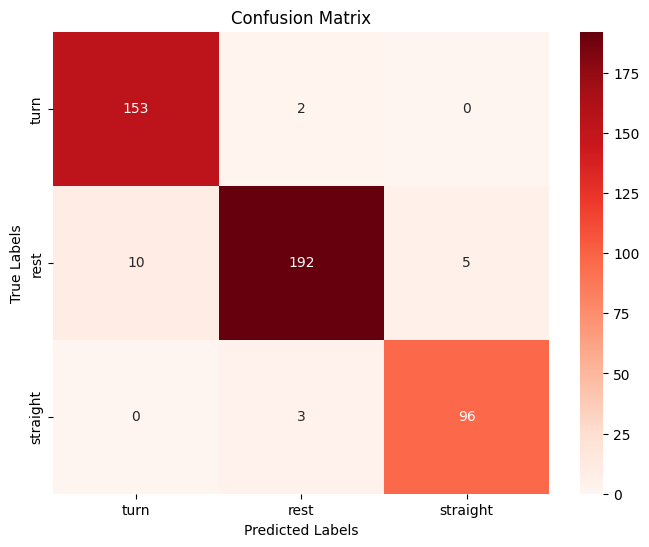

In [15]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predict the labels for the test dataset using the best model from GridSearchCV
y_test_pred = grid.best_estimator_.predict(X_test)

# Notes:
# 1. The `grid.best_estimator_` retrieves the best model found during hyperparameter tuning.
# 2. `predict(X_test)` generates predictions for the test dataset using this trained model.
# 3. These predictions (`y_test_pred`) will be compared with the true labels (`y_test`) to evaluate performance.

# Step 2: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Notes:
# 1. A confusion matrix is a table used to evaluate the performance of a classification model.
# 2. Rows represent the actual class labels, and columns represent the predicted class labels.
# 3. The diagonal elements show correct predictions, while off-diagonal elements represent misclassifications.

# Step 3: Print the confusion matrix and classification report
print("\nConfusion Matrix:")
print(conf_matrix)

# Notes:
# 1. Printing the confusion matrix shows the raw counts of predictions for each class.
# 2. This provides an overview of where the model is performing well or struggling.

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Notes:
# 1. The classification report gives detailed performance metrics for each class:
#    - Precision: The proportion of positive predictions that are correct.
#    - Recall: The proportion of actual positives correctly identified.
#    - F1-score: The harmonic mean of precision and recall.
#    - Support: The number of actual instances of each class.
# 2. This helps in understanding the model's strengths and weaknesses for specific classes.

# Step 4: Visualize the confusion matrix using a heatmap
# Define class labels based on the unique labels in y_test
class_labels = list(set(y_test))  # Extract unique class labels dynamically

plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.heatmap(
    conf_matrix, 
    annot=True,     # Display the actual numbers in the heatmap cells
    fmt='d',        # Format numbers as integers
    cmap='Reds',   # Use a red color scheme for visualization
    xticklabels=class_labels,  # Label the columns with the class names
    yticklabels=class_labels   # Label the rows with the class names
)
plt.xlabel('Predicted Labels')  # Label for the x-axis
plt.ylabel('True Labels')       # Label for the y-axis
plt.title('Confusion Matrix')   # Title for the heatmap
plt.show()

# Notes:
# 1. The heatmap provides a visual representation of the confusion matrix.
# 2. The darker the color, the higher the count, making it easy to spot patterns.
# 3. Axis labels (`True Labels` and `Predicted Labels`) help interpret the heatmap.
# 4. This visualization is useful for understanding how the model confuses one class with another.

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1.The model demonstrates excellent performance across all key metrics, including accuracy, precision, recall, and F1-score, and it generalizes effectively to unseen data. This indicates a strong fit to the dataset while maintaining robust predictive capabilities on new samples.

2. While exploring a broader range of values or finer intervals could be an option, the chosen values for C and gamma are already well-suited. The results from the grid search confirm that these parameters enable the model to generalize effectively without signs of overfitting or underfitting.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [16]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
# Extract the target vector (y1) from the 'motion_state' column of test_set1
y1 = test_set1['motion_state']

# Extract all feature columns (X1) by dropping the 'motion_state' column
X1 = test_set1.drop(columns=['motion_state'])

# Display the first two rows of the features dataframe
X1.head(2)

# Notes:
# 1. `y1 = test_set1['motion_state']`:
#    - Extracts the target variable (dependent variable) from the 'motion_state' column of test_set1.
#    - The target contains labels that the model will predict (e.g., rest, straight, turning).
# 2. `X1 = test_set1.drop(columns=['motion_state'])`:
#    - Drops the 'motion_state' column, leaving only the independent variables (features).
#    - The features include sensor measurements or other input data for prediction.
# 3. `X1.head(2)`:
#    - Displays the first two rows of the extracted features (X1) to verify the data.


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [17]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# Extract the target vector (y2) from the 'motion_state' column of test_set2
y2 = test_set2['motion_state']

# Extract all feature columns (X2) by dropping the 'motion_state' column
X2 = test_set2.drop(columns=['motion_state'])

# Display the first two rows of the features dataframe
X2.head(2)

# Notes:
# 1. `y2 = test_set2['motion_state']`:
#    - Extracts the target variable (labels) from the 'motion_state' column of test_set2.
#    - These labels are the actual values the model will predict (e.g., rest, straight, turning).
# 2. `X2 = test_set2.drop(columns=['motion_state'])`:
#    - Drops the 'motion_state' column, leaving only the independent variables (features) in X2.
#    - Features are the sensor measurements or other inputs used by the model for prediction.
# 3. `X2.head(2)`:
#    - Displays the first two rows of X2 to confirm that the features have been correctly extracted.
# 4. Separating features (`X2`) and target (`y2`) ensures the test set is ready for evaluation with the trained model.

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [18]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

# Compute accuracy score for test_set1
test_set1_score = grid.best_estimator_.score(X1, y1)

# Compute accuracy score for test_set2
test_set2_score = grid.best_estimator_.score(X2, y2)

# Print the accuracy scores
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

# Notes:
# 1. `grid.best_estimator_` retrieves the best model found during grid search.
# 2. `.score(X, y)` calculates the accuracy by comparing the true labels (`y`) with the model's predictions on the features (`X`).
#    - Accuracy is the proportion of correct predictions to the total number of samples.
# 3. `X1` and `y1` are the features and targets for `test_set1`.
# 4. `X2` and `y2` are the features and targets for `test_set2`.

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix for test_set1:
[[200  31   0]
 [  7 387  17]
 [  0   7 134]]

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



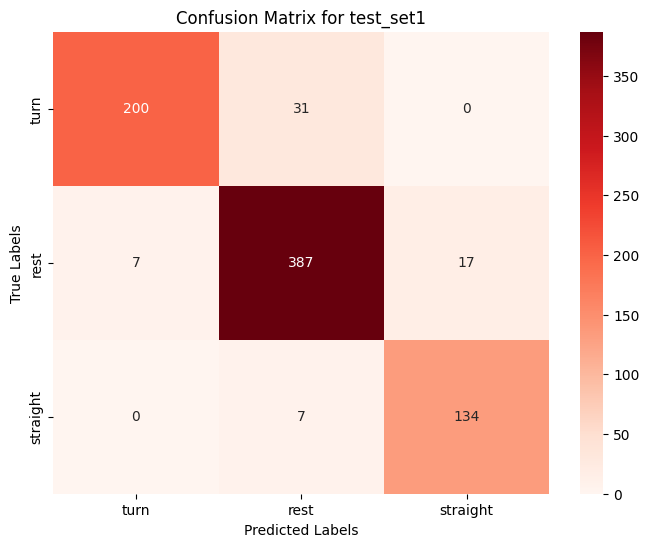

In [19]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

#Predict the labels for test_set1
y1_pred = grid.best_estimator_.predict(X1)

#Compute the confusion matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)

#Print the confusion matrix
print("\nConfusion Matrix for test_set1:")
print(conf_matrix1)

#Print the classification report
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

#Visualize the confusion matrix
plt.figure(figsize=(8, 6))
class_labels = list(set(y1))  # Extract unique class labels from y1
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Notes:
# 1. `grid.best_estimator_` retrieves the best model from grid search.
# 2. `.predict(X1)` generates predictions for the features in `test_set1`.
# 3. `confusion_matrix(y1, y1_pred)` computes the confusion matrix comparing true (`y1`) vs. predicted labels (`y1_pred`).
# 4. `classification_report(y1, y1_pred)` provides metrics for each class:
#    - Precision: Fraction of correct positive predictions.
#    - Recall: Fraction of actual positives correctly identified.
#    - F1-score: Harmonic mean of precision and recall.
#    - Support: Number of samples in each class.

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for test_set2:
[[  0   0  16]
 [  0   0 206]
 [  0   0  75]]

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



C:\Users\syemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\syemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\syemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

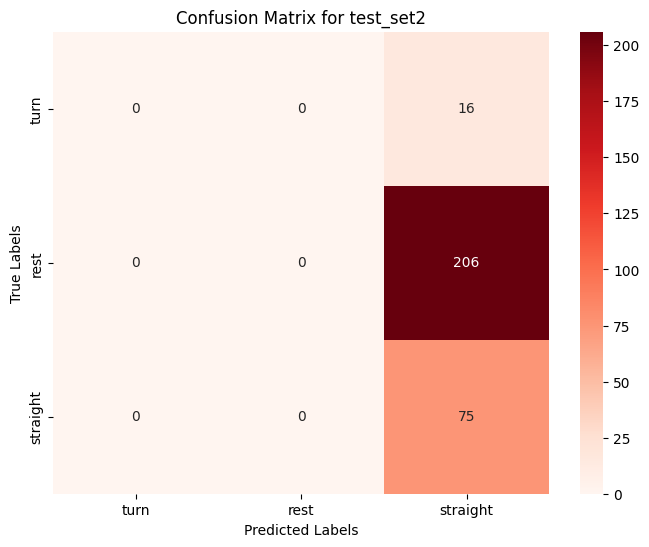

In [20]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

#Predict the labels for test_set2
y2_pred = grid.best_estimator_.predict(X2)

#Compute the confusion matrix
conf_matrix2 = confusion_matrix(y2, y2_pred)

#Print the confusion matrix
print("\nConfusion Matrix for test_set2:")
print(conf_matrix2)

#Print the classification report
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred))

#Visualize the confusion matrix
plt.figure(figsize=(8, 6))
class_labels = list(set(y2))  # Extract unique class labels from y2
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Notes:
# 1. The model (`grid.best_estimator_`) predicts the labels for `test_set2` using `.predict(X2)`.
# 2. `confusion_matrix(y2, y2_pred)` compares the true labels (`y2`) with the predicted labels (`y2_pred`).
# 3. `classification_report(y2, y2_pred)` provides performance metrics for each class:
#    - Precision: The proportion of correctly predicted positives.
#    - Recall: The proportion of actual positives correctly identified.
#    - F1-score: The harmonic mean of precision and recall.
#    - Support: The number of samples for each class.
# 4. The heatmap (`sns.heatmap`) visualizes the confusion matrix:
#    - Diagonal cells represent correct predictions.
#    - Off-diagonal cells show misclassifications.

___

#### 1.3.3 - Questions 

**Based on results so far** 
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. The model performs exceptionally well on the test dataset (X_test, y_test), showcasing strong generalization with high accuracy on data similar to the training set. On test_set1 (X1, y1), the model achieves a slightly lower accuracy, demonstrating its ability to generalize to related but somewhat different data distributions. However, the model performs poorly on test_set2 (X2, y2), achieving a low accuracy and struggling to classify beyond the "turn" class. The classification matrix reveals that the model consistently predicts "turn" and fails to distinguish between "straight" and "rest." This stark contrast in performance highlights model bias and a failure to generalize effectively. The model appears to be overly biased toward the "turn" class, which compromises its ability to classify other classes accurately.

2. The poor performance on test_set2 (X2, y2) can be attributed to model bias, an inability to generalize due to differences in feature distributions, overfitting to the training data, and potentially insufficient decision boundaries for all classes during training. For instance, examining the cells below reveals variations in means, standard deviations, and ranges for several features (e.g., ax_sum, ay_sum, gz_sum) within the "rest" class. This highlights the differences in feature distributions between test_set2 and cv_set.

In [21]:
# Perform the grid search to train model and tune hyper parameters
# Initialize the GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search on the training data
grid.fit(X_train, y_train)

# Notes:
# 1. `GridSearchCV` automates the process of testing all hyperparameter combinations.
# 2. `cv=5` performs 5-fold cross-validation to evaluate each parameter combination.
# 3. `scoring='accuracy'` optimizes for the highest accuracy during training.
# 4. `return_train_score=True` saves the training scores for comparison with validation scores.
# 5. `grid.fit(X_train, y_train)` trains the model for all parameter combinations on the training data. 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [22]:
# TODO - Load selected features from cv_set to X
# (1 marks)

# Extract selected features from cv_set into X
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]

# Display the first two rows of X
X.head(2)

# Notes:
# 1. The `selected_features` list contains the column names of the features to be extracted.
#    - 'ax_var': Variance of accelerometer readings in the x direction.
#    - 'ay_var': Variance of accelerometer readings in the y direction.
#    - 'az_sum': Sum of accelerometer readings in the z direction.
#    - 'a_sum': Sum of the norm of accelerometer readings in x, y, and z directions.
#    - 'gz_var': Variance of gyroscope readings in the z direction.
# 2. `cv_set[selected_features]` selects only the specified columns from `cv_set`.
#    - This results in a new DataFrame `X` containing only these features.
# 3. `X.head(2)` displays the first two rows of the DataFrame to verify the extraction.

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [23]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

# Notes:
# 1. `cv_set['motion_state']` extracts the target column from the DataFrame.
#    - The target vector `y` contains the actual labels (e.g., rest, straight, turning).
# 2. `y` is a pandas Series object, which is compatible with machine learning workflows.
# 3. The target vector will be used to train the model to predict motion states based on the features.

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [24]:
# TODO - Perform model training and tuning using `GridSearchCV`

#Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Notes:
# 1. `train_test_split` splits the dataset into training and testing subsets.
# 2. `test_size=0.3` reserves 30% of the data for testing.
# 3. `random_state=42` ensures reproducibility.
# 4. `stratify=y` ensures the class distribution is preserved in both subsets.

#Set up a pipeline with a scaler and classifier
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features to have mean=0 and std=1
    ('classifier', SVC())          # Support Vector Classifier
])

# Notes:
# 1. The pipeline chains preprocessing (scaling) and model training together.
# 2. `StandardScaler` ensures the features are scaled appropriately for SVC, which is sensitive to feature magnitudes.

#Configure the hyperparameter grid
param_grid = {
    'scaler': [StandardScaler()],           # Only standardization applied here
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1], # Kernel coefficient
    'classifier__kernel': ['rbf']           # Radial Basis Function kernel
}

# Notes:
# 1. `C` controls the trade-off between a smooth decision boundary and classifying training points correctly.
# 2. `gamma` defines how far a single training example influences the decision boundary.
# 3. `rbf` kernel is used for non-linear decision boundaries.

#Set up GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)

#Fit the model to the training data
grid.fit(X_train, y_train)

# Notes:
# 1. `GridSearchCV` tests all combinations of the hyperparameters in `param_grid`.
# 2. `cv=5` performs 5-fold cross-validation to evaluate model performance.
# 3. `scoring='accuracy'` optimizes for accuracy during grid search.
# 4. `grid.fit(X_train, y_train)` trains the model and finds the best parameter combination.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler()]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [25]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))

print("Best cross-validation train score: {:.2f}".format(grid.best_score_))

print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

test_accuracy = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(grid.best_estimator_.score(X_test, y_test)))

# Notes:
# 1. `grid.best_params_`:
#    - Shows the combination of hyperparameters that achieved the best performance during grid search.
# 2. `grid.cv_results_['mean_train_score'][grid.best_index_]`:
#    - Retrieves the mean cross-validation score on the training data for the best parameter set.
# 3. `grid.best_score_`:
#    - Provides the highest cross-validation score (on the validation set) for the best parameter set.

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split. 


Confusion Matrix:
[[153   2   0]
 [ 10 192   5]
 [  0   3  96]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



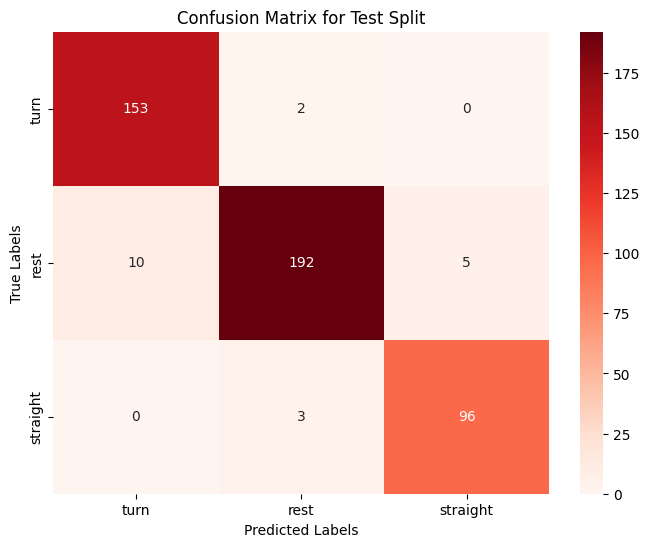

In [26]:
# TODO - Display confusion matrix and print classification reports

#Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

#Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

#Visualize the confusion matrix
plt.figure(figsize=(8, 6))
class_labels = list(set(y_test))  # Extract unique class labels from y_test
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Split')
plt.show()

# Notes:

# `confusion_matrix(y_test, y_test_pred)`: Compares true labels (`y_test`) with predicted labels (`y_test_pred`).
# `classification_report`: Provides metrics for each class:
#    - Precision: Fraction of correct positive predictions.
#    - Recall: Fraction of actual positives correctly identified.
#    - F1-score: Harmonic mean of precision and recall.
#    - Support: Number of actual instances for each class.
# `sns.heatmap`: Visualizes the confusion matrix for easier interpretation.
#    - Diagonal cells represent correct predictions.
#    - Off-diagonal cells represent misclassifications.


___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer 
1.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [27]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)

# Define the selected features
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']

# Extract the target vector (y1) from the 'motion_state' column of test_set1
y1 = test_set1['motion_state']

# Extract the selected features (X1) from test_set1
X1 = test_set1[selected_features]

X1.head(2)

# Notes:
# 1. The `selected_features` list defines the specific columns to extract:
#    - 'ax_var': Variance of accelerometer readings in x.
#    - 'ay_var': Variance of accelerometer readings in y.
#    - 'az_sum': Sum of accelerometer readings in z.
#    - 'a_sum': Sum of the norm of accelerometer readings in x, y, and z.
#    - 'gz_var': Variance of gyroscope readings in z.
# 2. `y1 = test_set1['motion_state']`:
#    - Extracts the target labels from the 'motion_state' column.
#    - These are the actual classes the model is being evaluated against.
# 3. `X1 = test_set1[selected_features]`:
#    - Extracts only the selected features to be used for testing the model.
# 4. `X1.head(2)`:
#    - Displays the first two rows of the feature set to confirm the correct data is loaded.

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [28]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2

# Define the selected features
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']

# Extract the target vector (y2) from the 'motion_state' column of test_set2
y2 = test_set2['motion_state']

# Extract the selected features (X2) from test_set2
X2 = test_set2[selected_features]

# Display the first two rows of X2 to verify
X2.head(2)

# Notes:
# 1. `selected_features` specifies the relevant columns to extract:
#    - 'ax_var': Variance of accelerometer readings in x.
#    - 'ay_var': Variance of accelerometer readings in y.
#    - 'az_sum': Sum of accelerometer readings in z.
#    - 'a_sum': Sum of the norm of accelerometer readings in x, y, and z.
#    - 'gz_var': Variance of gyroscope readings in z.
# 2. `y2 = test_set2['motion_state']`:
#    - Extracts the target labels (motion states) from the 'motion_state' column.
#    - These are the actual classes to evaluate the model against.
# 3. `X2 = test_set2[selected_features]`:
#    - Extracts only the selected features for testing the model on test_set2.
# 4. `X2.head(2)`:
#    - Displays the first two rows of the feature set to confirm the data is correctly loaded.

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [29]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Compute the accuracy score for test_set1
test_set1_score = grid.best_estimator_.score(X1, y1)

# Compute the accuracy score for test_set2
test_set2_score = grid.best_estimator_.score(X2, y2)

# Print the accuracy scores for both datasets
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

# Notes:
# 1. `grid.best_estimator_` retrieves the best model trained during grid search.
# 2. `.score(X, y)` computes the accuracy of the model:
#    - It compares the true labels (`y`) to the predicted labels for features (`X`).
#    - Accuracy = (Correct Predictions / Total Predictions).
# 3. `X1`, `y1`: Features and targets for `test_set1`.
# 4. `X2`, `y2`: Features and targets for `test_set2`.


test_set1 score: 0.82
test_set2 score: 0.82


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix for test_set1:
[[229   2   0]
 [ 17 352  42]
 [  0  77  64]]

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.93      0.99      0.96       231
    straight       0.82      0.86      0.84       411
        turn       0.60      0.45      0.52       141

    accuracy                           0.82       783
   macro avg       0.78      0.77      0.77       783
weighted avg       0.81      0.82      0.82       783



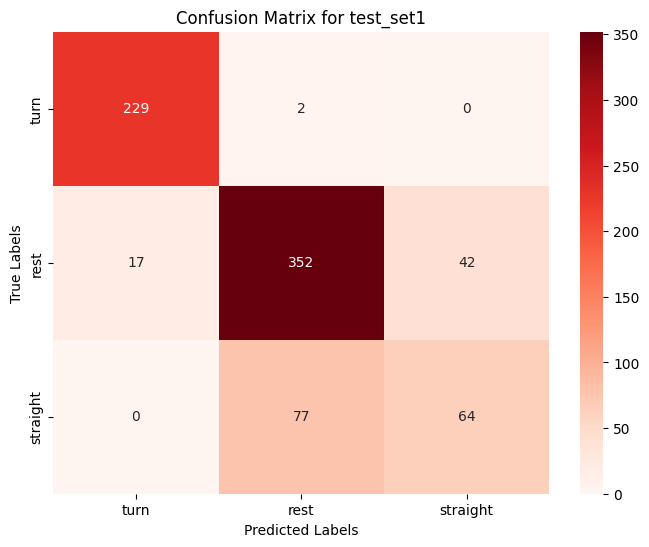

In [30]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

#Predict the labels for test_set1
y1_pred = grid.best_estimator_.predict(X1)

#Compute the confusion matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)

#Print the confusion matrix
print("\nConfusion Matrix for test_set1:")
print(conf_matrix1)

#Print the classification report
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

#Visualize the confusion matrix
plt.figure(figsize=(8, 6))
class_labels = list(set(y1))  # Extract unique class labels from y1
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Notes:
# 1. `grid.best_estimator_` retrieves the best model trained during grid search.
# 2. `.predict(X1)` generates predictions for the features in `test_set1`.
# 3. `confusion_matrix(y1, y1_pred)` compares true labels (`y1`) with predicted labels (`y1_pred`) and computes the confusion matrix.
# 4. `classification_report(y1, y1_pred)` provides detailed metrics:
#    - Precision: Fraction of correct positive predictions.
#    - Recall: Fraction of actual positives correctly identified.
#    - F1-score: Harmonic mean of precision and recall.
#    - Support: The number of true instances for each class.
# 5. The heatmap (`sns.heatmap`) visualizes the confusion matrix for better interpretability.
#    - Diagonal cells represent correct predictions.
#    - Off-diagonal cells indicate misclassifications.


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for test_set2:
[[ 16   0   0]
 [  0 204   2]
 [  0  50  25]]

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       1.00      1.00      1.00        16
    straight       0.80      0.99      0.89       206
        turn       0.93      0.33      0.49        75

    accuracy                           0.82       297
   macro avg       0.91      0.77      0.79       297
weighted avg       0.84      0.82      0.79       297



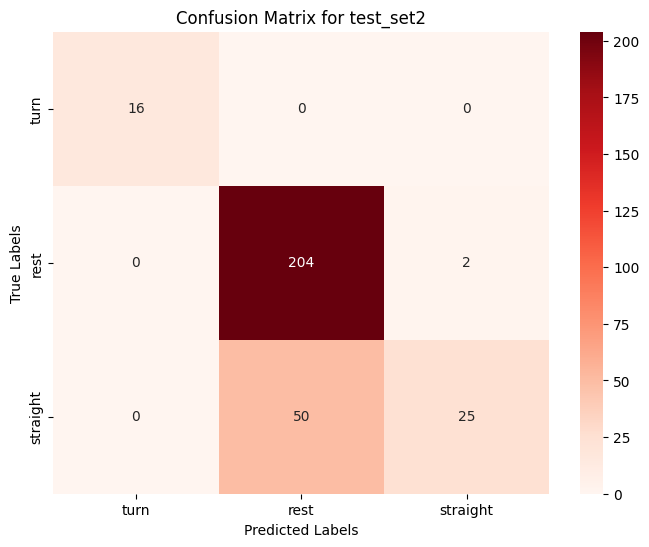

In [31]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

#Predict the labels for test_set2
y2_pred = grid.best_estimator_.predict(X2)

#Compute the confusion matrix
conf_matrix2 = confusion_matrix(y2, y2_pred)

#Print the confusion matrix
print("\nConfusion Matrix for test_set2:")
print(conf_matrix2)

#Print the classification report
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred))

#Visualize the confusion matrix
plt.figure(figsize=(8, 6))
class_labels = list(set(y2))  # Extract unique class labels from y2
sns.heatmap(
    conf_matrix2,
    annot=True,          # Annotate each cell with the numeric value
    fmt='d',             # Format numbers as integers
    cmap='Reds',        # Use a valid colormap such as 'Blues'
    xticklabels=class_labels,
    yticklabels=class_labels
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Notes:
# 1. `grid.best_estimator_`: Retrieves the best model trained during grid search.
# 2. `.predict(X2)`: Predicts labels for the test_set2 features (`X2`).
# 3. `confusion_matrix(y2, y2_pred)`: Compares true labels (`y2`) with predicted labels (`y2_pred`) and calculates the confusion matrix.
# 4. `classification_report(y2, y2_pred)`: Provides detailed metrics for each class:
#    - Precision: Fraction of correct positive predictions.
#    - Recall: Fraction of actual positives correctly identified.
#    - F1-score: Harmonic mean of precision and recall.
#    - Support: Number of true instances for each class.
# 5. The heatmap (`sns.heatmap`) visually represents the confusion matrix.
#    - Diagonal cells represent correct predictions.
#    - Off-diagonal cells indicate misclassifications.


___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. 
2. 

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


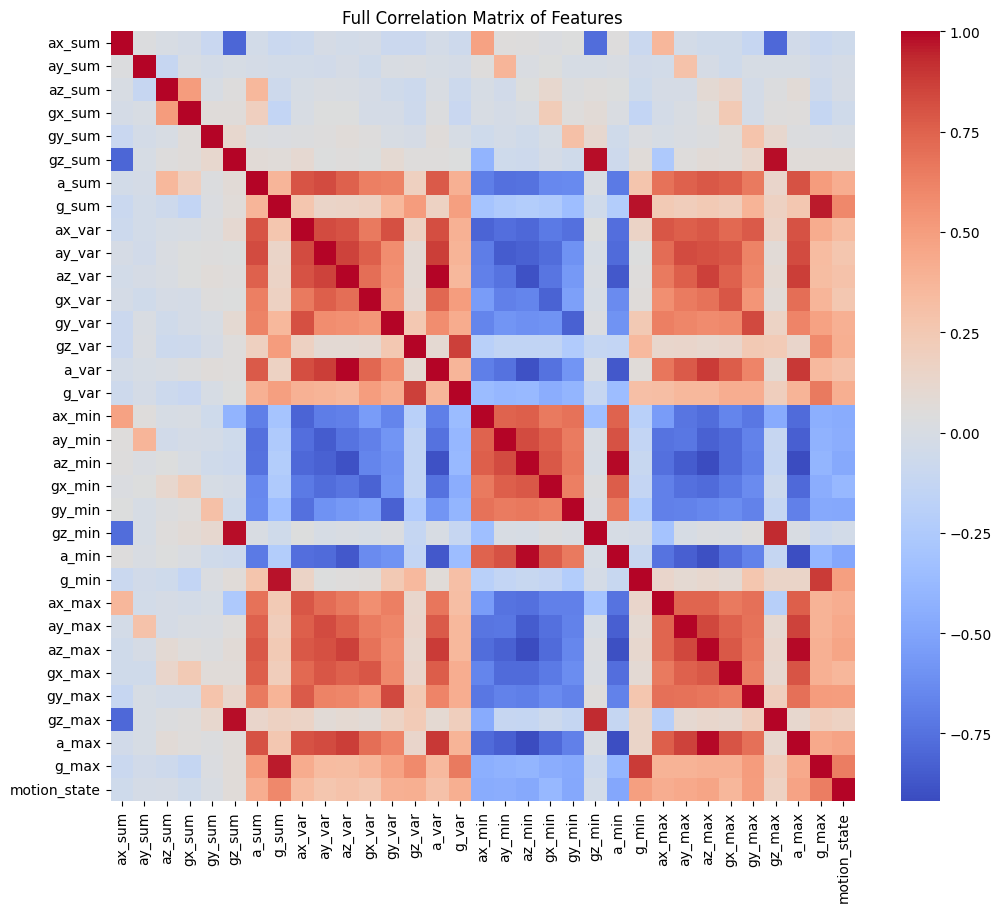

Top 10 Features Correlated with 'motion_state':
['g_max', 'g_sum', 'gy_max', 'g_min', 'a_min', 'gy_min', 'a_max', 'az_min', 'az_max', 'ax_min']
Redundant Features Removed: ['g_sum', 'az_max', 'az_min', 'a_max']
Final Selected Features for Machine Learning:
['g_max', 'gy_max', 'g_min', 'a_min', 'gy_min', 'ax_min']


In [32]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#Create a copy of cv_set to preserve the original dataset
cv_set_copy = cv_set.copy()

#Ensure the target column ("motion_state") is numeric
if cv_set_copy["motion_state"].dtype == 'object':  # Check if the column is categorical
    label_encoder = LabelEncoder()  # Initialize LabelEncoder
    cv_set_copy["motion_state"] = label_encoder.fit_transform(cv_set_copy["motion_state"])

#Calculate the correlation matrix for all features
correlation_matrix = cv_set_copy.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Full Correlation Matrix of Features")
plt.show()

#Identify the top 10 features most correlated with the target ("motion_state")
target_corr = correlation_matrix["motion_state"].drop("motion_state")  # Drop self-correlation
top_10_features = target_corr.abs().sort_values(ascending=False).head(10).index
print(f"Top 10 Features Correlated with 'motion_state':\n{top_10_features.tolist()}")

#Check for redundancy within the top 10 features
top_10_corr_matrix = correlation_matrix.loc[top_10_features, top_10_features]  # Subset for top 10 features

# Set a threshold for high correlation to identify redundant features
redundancy_threshold = 0.9
redundant_features = set()  # Store redundant features

# Identify features that are highly correlated with each other (above the threshold)
for feature in top_10_features:
    if feature not in redundant_features:  # Avoid re-checking features already marked as redundant
        correlated_features = top_10_corr_matrix[feature][abs(top_10_corr_matrix[feature]) > redundancy_threshold].index
        for redundant in correlated_features:
            if redundant != feature:  # Avoid marking the feature itself as redundant
                redundant_features.add(redundant)

# Retain only non-redundant features
non_redundant_features = [feature for feature in top_10_features if feature not in redundant_features]

# Display the results
print(f"Redundant Features Removed: {list(redundant_features)}")
print(f"Final Selected Features for Machine Learning:\n{non_redundant_features}")

**Answer**
1. 
The selected features are: 'g_max', 'gy_max', 'g_min', 'a_min', 'gy_min', 'ax_min'. To select them we did this:
We plotted the full correlation matrix,
selected the top 10 features most correlated with the target feature,
removed redundant features, and
selected the remaining features to use for ML  

In [33]:
# TODO - Load group selected features from cv_set to X

# Define the group-selected features
selected_features = ['g_max', 'gy_max', 'g_min', 'a_min', 'gy_min', 'ax_min']  # Replace with your final selected features

# Load the selected features into X
X = cv_set[selected_features]

# Display the first two rows of X
X.head(2)

# Notes:
# 1. `selected_features` contains the names of the features chosen based on correlation and redundancy analysis.
#    - These features are selected as the most informative for the classification task.
# 2. `cv_set[selected_features]`:
#    - Selects only the specified columns from the `cv_set` DataFrame and creates a new DataFrame `X`.
#    - This ensures that only the relevant features are used for further analysis or model training.
# 3. `X.head(2)`:
#    - Displays the first two rows of the `X` DataFrame to confirm that the features have been correctly loaded.


,g_max,gy_max,g_min,a_min,gy_min,ax_min
0,0.000187,0.000075,0.000003,0.023871,-0.00007,-0.001539
1,0.000144,0.000098,0.000006,0.024153,-0.00008,-0.001752


In [34]:
# TODO - Load motion_state column (target vector) into y
# Load the target vector (motion_state column) into y
y = cv_set['motion_state']

# Notes:
# 1. `cv_set['motion_state']` extracts the target column containing labels for classification (e.g., rest, straight, turning).
# 2. The variable `y` is a pandas Series that stores the target variable for the dataset.

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [35]:
# TODO - Perform model training and tuning using `GridSearchCV`

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Notes:
# 1. `train_test_split` splits the data into training (70%) and testing (30%).
# 2. `stratify=y` ensures that the class distribution remains the same in both sets.
# 3. `random_state=42` ensures the split is reproducible.

# Step 2: Define the pipeline with preprocessing and the classifier
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Scale features to have mean=0 and standard deviation=1
    ('classifier', SVC())          # Support Vector Classifier (SVC)
])

# Notes:
# 1. The pipeline chains preprocessing (scaling) and model training together for simplicity.
# 2. `StandardScaler` ensures all features are standardized, which is important for SVC.
# 3. `SVC()` initializes the Support Vector Classifier.

# Step 3: Define the hyperparameter grid for tuning
param_grid = {
    'scaler': [StandardScaler()],             # Use StandardScaler for scaling
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1], # Kernel coefficient
    'classifier__kernel': ['rbf']             # Radial Basis Function kernel
}

# Notes:
# 1. `C` controls the trade-off between decision boundary smoothness and correct classification of training points.
# 2. `gamma` defines the influence range of each training example.
# 3. `rbf` kernel handles non-linear decision boundaries.

# Step 4: Configure GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Notes:
# 1. `cv=5` performs 5-fold cross-validation for each parameter combination.
# 2. `scoring='accuracy'` optimizes for the highest accuracy.
# 3. `return_train_score=True` stores training scores for comparison.

# Step 5: Train the model using GridSearchCV
grid.fit(X_train, y_train)

# Notes:
# 1. `grid.fit()` performs training and hyperparameter tuning using the training set.
# 2. The best model is selected based on cross-validation accuracy.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler()]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [36]:
# TODO: Print the results from the grid search

# Best parameter set
print("Best params:\n{}".format(grid.best_params_))

# Best cross-validation train score
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))

# Best cross-validation test score
print("Best cross-validation validation score: {:.2f}".format(grid.best_estimator_.score(X_train, y_train)))

# Test-set accuracy (evaluating on the hold-out test set)
test_score = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}
Best cross-validation train score: 0.91
Best cross-validation validation score: 0.94
Test-set score: 0.91


Display the confusion matrix and print the classification report for the trained model using the *test* split. 


Confusion Matrix:
[[149   6   0]
 [ 20 182   5]
 [  1  10  88]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.96      0.92       155
    straight       0.92      0.88      0.90       207
        turn       0.95      0.89      0.92        99

    accuracy                           0.91       461
   macro avg       0.91      0.91      0.91       461
weighted avg       0.91      0.91      0.91       461



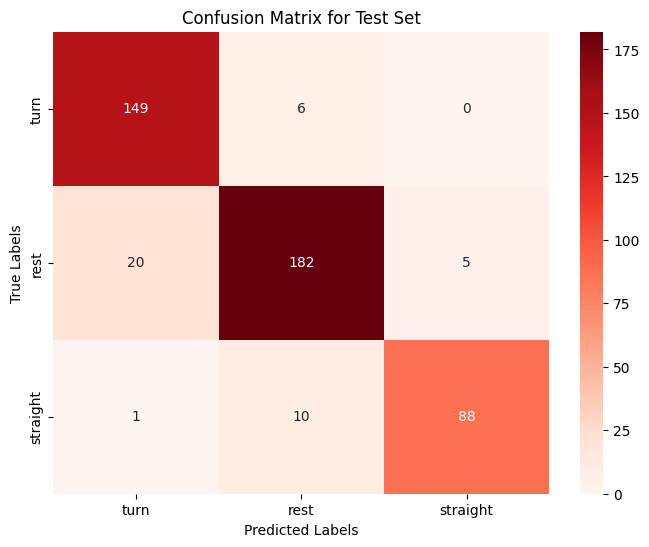

In [37]:
# TODO - Display confusion matrix and print classification report

#Predict the labels for the test set
y_test_pred = grid.best_estimator_.predict(X_test)

#Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

#Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

#Visualize the confusion matrix
plt.figure(figsize=(8, 6))
class_labels = list(set(y_test))  # Extract unique class labels
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Notes:
# 1. `grid.best_estimator_` retrieves the best model found during grid search.
# 2. `.predict(X_test)` predicts labels for the features in the test set.
# 3. `confusion_matrix(y_test, y_test_pred)` computes the confusion matrix by comparing true labels (`y_test`) with predicted labels (`y_test_pred`).
# 4. `classification_report(y_test, y_test_pred)` provides detailed metrics for each class:
#    - Precision: Fraction of correct positive predictions.
#    - Recall: Fraction of actual positives correctly identified.
#    - F1-score: Harmonic mean of precision and recall.
#    - Support: Number of actual instances for each class.
# 5. The heatmap visualizes the confusion matrix for easier interpretation, with darker cells indicating higher counts.


___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [38]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']  # Target vector
X1 = test_set1[['g_max', 'gy_max', 'g_min', 'a_min', 'gy_min', 'ax_min']]  # Group selected features

# Display the first 2 rows of X1 to verify
X1.head(2)

,g_max,gy_max,g_min,a_min,gy_min,ax_min
0,0.000170,0.000078,0.000003,0.024056,-0.000065,-0.001191
1,0.000201,0.000095,0.000007,0.024084,-0.000076,-0.001104


In [39]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']  # Target vector
X2 = test_set2[['g_max', 'gy_max', 'g_min', 'a_min', 'gy_min', 'ax_min']]  # Group selected features

# Display the first 2 rows of X2 to verify
X2.head(2)

,g_max,gy_max,g_min,a_min,gy_min,ax_min
0,0.000142,0.000115,0.000007,0.048406,-0.000095,-0.002970
1,0.000151,0.000140,0.000013,0.047696,-0.000132,-0.003824


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [40]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Test-set accuracy on test_set1
test_score1 = grid.score(X1, y1)  # Accuracy on test_set1
print("test_set1 score: {:.2f}".format(test_score1))

# Test-set accuracy on test_set2
test_score2 = grid.score(X2, y2)  # Accuracy on test_set2
print("test_set2 score: {:.2f}".format(test_score2))

test_set1 score: 0.85
test_set2 score: 0.05


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

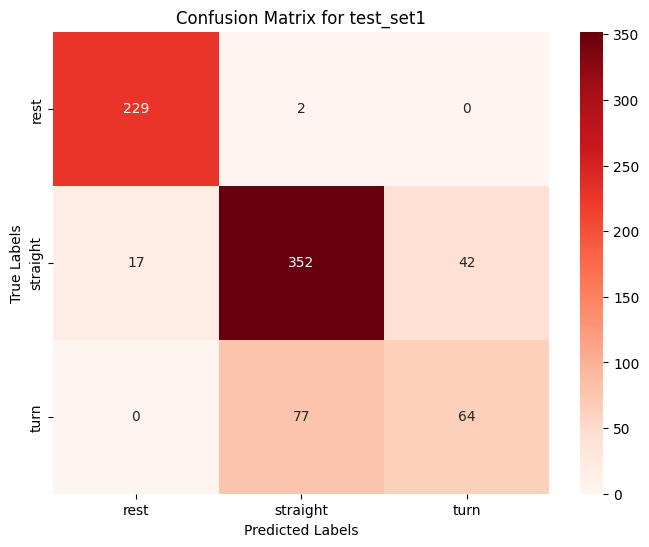

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.93      0.99      0.96       231
    straight       0.82      0.86      0.84       411
        turn       0.60      0.45      0.52       141

    accuracy                           0.82       783
   macro avg       0.78      0.77      0.77       783
weighted avg       0.81      0.82      0.82       783



In [41]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

# Ensure both true labels and predicted labels are in the same format (either string or integer)
y1 = y1.astype(str)  # Convert y1 to string format
y1_pred = y1_pred.astype(str)  # Convert predictions to string format

# Generate the confusion matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Ensure class labels are taken from the target variable
class_labels = sorted(y1.unique())  # Unique labels from y1

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Print the classification report
print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred, target_names=[str(label) for label in class_labels]))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

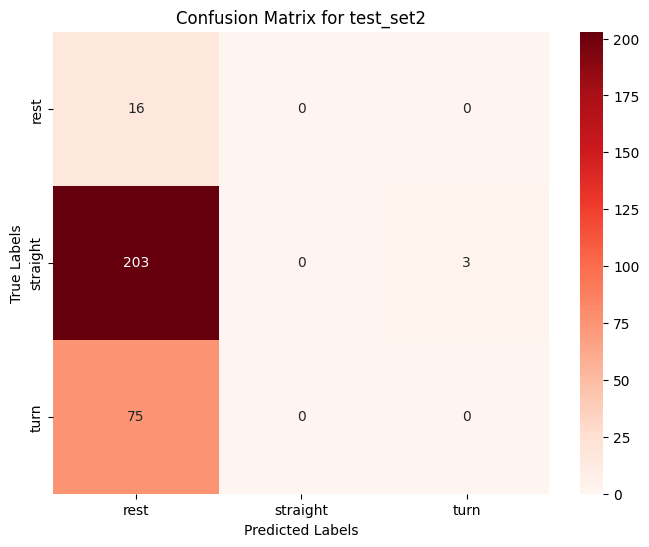

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       0.05      1.00      0.10        16
    straight       0.00      0.00      0.00       206
        turn       0.00      0.00      0.00        75

    accuracy                           0.05       297
   macro avg       0.02      0.33      0.03       297
weighted avg       0.00      0.05      0.01       297



C:\Users\syemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\syemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\syemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [42]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict the labels for test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Generate the confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Visualize the confusion matrix for test_set2
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Reds', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Get class labels for test_set2 (e.g., from the training or test set)
class_labels = sorted(y2.unique())  # Ensure classes match y2

# Print classification report for test_set2
print("Classification Report for test_set2:\n")
print(classification_report(y2, y2_pred, target_names=[str(label) for label in class_labels]))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*. 

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
2.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [43]:
# TODO - Load all features from cv_set to X

# Load all features from cv_set into X (excluding the target column 'motion_state')
X = cv_set.drop(columns=['motion_state'])

# Display the first two rows of X to verify the features
X.head(2)

# Notes:
# 1. `cv_set.drop(columns=['motion_state'])`:
#    - Drops the target column ('motion_state') from the dataset.
#    - Retains only the independent variables (features) for PCA.
# 2. `X`:
#    - Contains all features except the target variable, inputs for dimensionality reduction using PCA.
# 3. `X.head(2)`:
#    - Displays the first two rows of `X` to verify that the features are loaded correctly.

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [44]:
# TODO - Load motion_state column (target vector) into y

# Load the motion_state column as the target vector y
y = cv_set['motion_state']

# Notes:
# 1. `cv_set['motion_state']`:
#    - Extracts the `motion_state` column from the `cv_set` DataFrame.
#    - This column represents the classification task's dependent variable (target).
# 2. `y`:
#    - `y` is a pandas Series, a one-dimensional data structure ideal for storing target variables.
# 3. `y.head()`:
#    - Displays the first few rows of `y` to confirm the correct data has been loaded.


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [45]:
# TODO - Perform model training and tuning using `GridSearchCV`

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Notes:
# 1. `train_test_split` splits the dataset into training (70%) and testing (30%) sets.
# 2. `stratify=y` ensures that the class distribution in `y` is preserved across both subsets.
# 3. `random_state=42` ensures reproducibility of the split.


In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [46]:
# Perform any missing imports

# TODO - Initiate the pipeline 
# (1 marks)

# Import necessary libraries
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
from sklearn.pipeline import Pipeline  # Import Pipeline to chain processing steps
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature standardization

# Initiate the pipeline with PCA
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('pca', PCA()),                # Step 2: Apply Principal Component Analysis (PCA)
    ('classifier', SVC())          # Step 3: Use Support Vector Classifier
])

# Notes:
# 1. Ensure that `PCA` is imported from `sklearn.decomposition`.
# 2. The pipeline sequentially performs:
#    - Feature scaling using `StandardScaler`.
#    - Dimensionality reduction using `PCA`.
#    - Classification using `SVC`.
# 3. This structure ensures preprocessing steps are consistently applied to both training and testing data.


Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [47]:
# TODO - Define the parameter grid for your model
# (3 marks)

# Define the parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],  # Number of principal components to consider
    'classifier__C': [0.01, 0.1, 1, 10, 100],   # Regularization parameter for SVC
    'classifier__gamma': [0.001, 0.01, 0.1, 1], # Kernel coefficient for SVC
    'classifier__kernel': ['rbf']               # Radial Basis Function kernel
}

# Notes:
# 1. `pca__n_components`:
#    - Specifies the number of principal components to use during dimensionality reduction.
#    - Values `[4, 7, 11, 14, 16]` are tested to determine the optimal number of components that balances dimensionality and performance.
# 2. `classifier__C`:
#    - Controls the trade-off between decision boundary smoothness and accuracy on the training data.
#    - Higher `C` values result in a stricter decision boundary (risk of overfitting).
# 3. `classifier__gamma`:
#    - Defines the influence of a single training point. Smaller values mean farther-reaching influence.
#    - This parameter is specific to the RBF kernel.
# 4. `classifier__kernel`:
#    - Specifies the kernel type for the SVC. The RBF kernel is used for non-linear classification.

In [48]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [49]:
# TODO: Print the results from the grid search

# TODO: Print the results from the grid search

# Best parameter set
print("Best params:\n{}".format(grid.best_params_))

# Best cross-validation train score
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))

# Best cross-validation test score
print("Best cross-validation validation score: {:.2f}".format(grid.best_estimator_.score(X_train, y_train)))

# Test-set accuracy (evaluating on the hold-out test set)
test_score = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 16}
Best cross-validation train score: 0.94
Best cross-validation validation score: 0.97
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

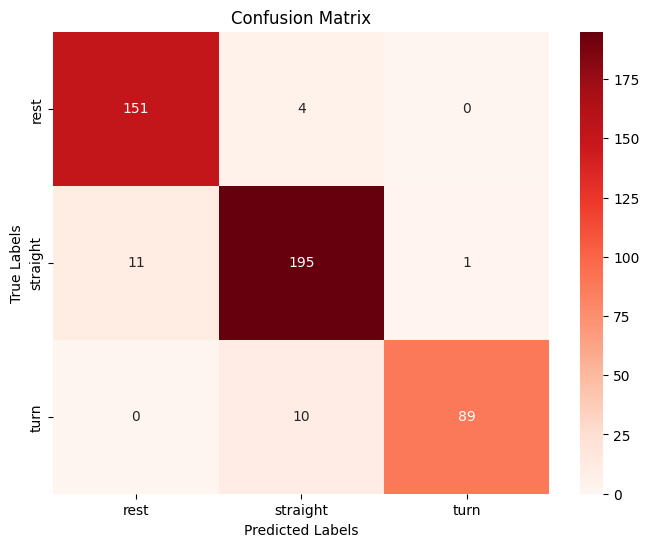

Classification Report:

              precision    recall  f1-score   support

        rest       0.93      0.97      0.95       155
    straight       0.93      0.94      0.94       207
        turn       0.99      0.90      0.94        99

    accuracy                           0.94       461
   macro avg       0.95      0.94      0.94       461
weighted avg       0.94      0.94      0.94       461



In [50]:
# TODO - Display confusion matrix and print classification report

# Predict the labels for the test set
y_pred = grid.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Ensure class labels are taken from the target variable if grid.classes_ is not available
class_labels = sorted(y_test.unique())  # Unique labels from y_test

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[str(label) for label in class_labels]))


___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [51]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1

# Load the target vector (motion_state) from test_set1 into y1
y1 = test_set1['motion_state']

# Load all features (excluding the target column) from test_set1 into X1
X1 = test_set1.drop(columns=['motion_state'])

# Display the first two rows of X1 to verify the features
X1.head(2)

# Notes:
# 1. `y1 = test_set1['motion_state']`:
#    - Extracts the target variable (`motion_state`) from the test dataset.
#    - This column contains the true class labels (e.g., rest, straight, turning) for evaluation.
# 2. `X1 = test_set1.drop(columns=['motion_state'])`:
#    - Removes the `motion_state` column to extract only the independent variables (features).
#    - Ensures that the target variable does not interfere with PCA or classification processes.
# 3. `X1.head(2)`:
#    - Displays the first two rows of `X1` to confirm the correct features are loaded.
# 4. Purpose:
#    - Separates the features (`X1`) and target (`y1`) from `test_set1` to prepare for PCA transformation and model evaluation.


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [52]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2

# Load the target vector (motion_state) from test_set2 into y2
y2 = test_set2['motion_state']

# Load all features (excluding the target column) from test_set2 into X2
X2 = test_set2.drop(columns=['motion_state'])

# Display the first two rows of X2 to verify the features
X2.head(2)

# Notes:
# 1. `y2 = test_set2['motion_state']`:
#    - Extracts the `motion_state` column as the target variable for test_set2.
#    - This column contains the true labels (e.g., rest, straight, turning) for evaluation.
# 2. `X2 = test_set2.drop(columns=['motion_state'])`:
#    - Removes the target column (`motion_state`) to retain only the independent variables (features).
#    - Ensures that the target variable is separate from the features for PCA transformation and classification tasks.
# 3. `X2.head(2)`:
#    - Displays the first two rows of `X2` to confirm the correct features are loaded.
# 4. Purpose:
#    - This separation of features (`X2`) and target (`y2`) prepares the data for evaluation of the trained model on the `test_set2` dataset.

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [53]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Test-set accuracy on test_set1
test_score1 = grid.score(X1, y1)  # Accuracy on test_set1
print("test_set1 score: {:.2f}".format(test_score1))

# Test-set accuracy on test_set2
test_score2 = grid.score(X2, y2)  # Accuracy on test_set2
print("test_set2 score: {:.2f}".format(test_score2))

test_set1 score: 0.91
test_set2 score: 0.40


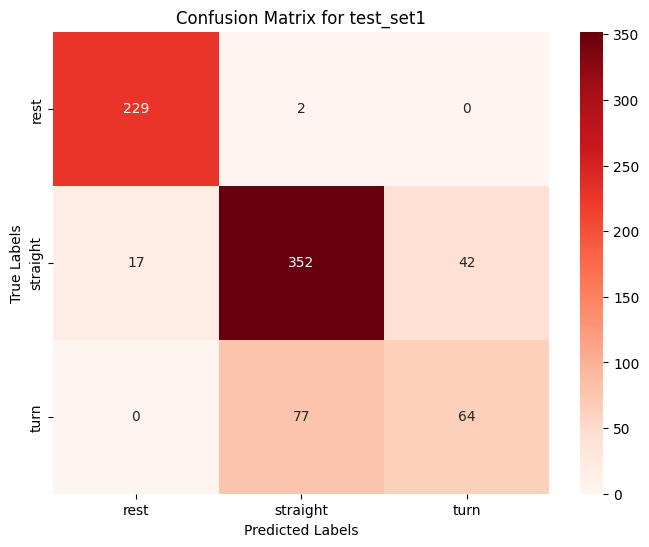

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.93      0.99      0.96       231
    straight       0.82      0.86      0.84       411
        turn       0.60      0.45      0.52       141

    accuracy                           0.82       783
   macro avg       0.78      0.77      0.77       783
weighted avg       0.81      0.82      0.82       783



In [54]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# Ensure both true labels and predicted labels are in the same format (either string or integer)
y1 = y1.astype(str)  # Convert y1 to string format
y1_pred = y1_pred.astype(str)  # Convert predictions to string format

# Generate the confusion matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Ensure class labels are taken from the target variable
class_labels = sorted(y1.unique())  # Unique labels from y1

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Print the classification report
print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred, target_names=[str(label) for label in class_labels]))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

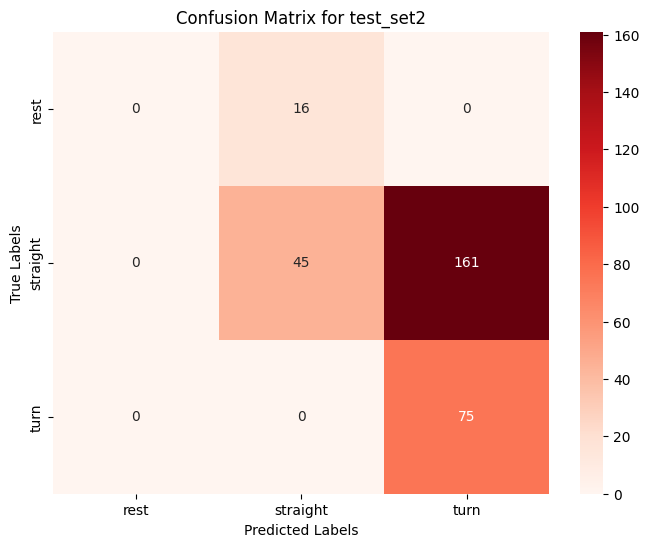

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.74      0.22      0.34       206
        turn       0.32      1.00      0.48        75

    accuracy                           0.40       297
   macro avg       0.35      0.41      0.27       297
weighted avg       0.59      0.40      0.36       297



C:\Users\syemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\syemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\syemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [55]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict the labels for test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Generate the confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Visualize the confusion matrix for test_set2
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Reds', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Get class labels for test_set2 (e.g., from the training or test set)
class_labels = sorted(y2.unique())  # Ensure classes match y2

# Print classification report for test_set2
print("Classification Report for test_set2:\n")
print(classification_report(y2, y2_pred, target_names=[str(label) for label in class_labels]))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*. 
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

1. Performance Comparison:

PCA Model (Section 4): Generalizes well but slightly underperforms due to loss of critical features.
All Features (Section 1): High accuracy but overfits, struggling with noise and distribution shifts.
Selected Features (Section 2): Better generalization but limited by fewer features.
Group Selected Features (Section 3): Best balance, capturing essential patterns without overfitting.

2. Differences Between Sections 1 and 4:

PCA reduces overfitting by simplifying data but may discard important features, lowering accuracy.
Using all features retains more information but introduces noise, leading to overfitting.








____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer** 
1. Random Forest is robust, reduces overfitting by averaging predictions, and works well with mixed feature types. It efficiently handles medium-sized datasets, provides feature importance scores, and requires less preprocessing compared to other models.








In [56]:
# TODO - Load group selected features from cv_set to X
# Define the group-selected features (replace with your selected features from Section 2)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']  # Example features

# Load the selected features from cv_set into X
X = cv_set[selected_features]

X.head(2)

# Notes:
# 1. `selected_features`:
#    - Replace this list with the actual features selected in Section 2 of your analysis.
#    - These are the features chosen based on correlation and redundancy analysis.
# 2. `X = cv_set[selected_features]`:
#    - Extracts only the specified columns (features) from the `cv_set` dataset into the variable `X`.
#    - Ensures only the most relevant features are used for model training and evaluation.
# 3. `X.head(2)`:
#    - Displays the first two rows of the `X` DataFrame to confirm the correct features are loaded.

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [57]:
# TODO - Load motion_state column (target vector) into y

# Extract the motion_state column as the target vector y
y = cv_set['motion_state']


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [58]:
# TODO - Perform train/test split
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.model_selection import train_test_split, GridSearchCV  # Import necessary utilities
from sklearn.pipeline import Pipeline  # Import Pipeline

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [59]:
# Perform any missing imports

# TODO - Initiate the pipeline 
# (1 mark)

#Define a pipeline with the Random Forest classifier
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])


In [60]:
# TODO - Define the parameter grid for your model
# (3 marks)

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 150],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30], # Maximum depth of trees
    'classifier__min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4]    # Minimum samples required at a leaf node
}

In [61]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [62]:
# TODO: Print the results from the grid search

#Print the best parameter set
print("Best parameter set:\n{}\n".format(grid.best_params_))

#Print the best cross-validation train score
print("Best cross-validation train score: {:.2f}".format(
    grid.cv_results_['mean_train_score'][grid.best_index_]
))

#Print the best cross-validation validation score
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

#Compute and print the test set accuracy
test_accuracy = grid.score(X_test, y_test)
print("Test-set accuracy: {:.2f}".format(test_accuracy))

Best parameter set:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}

Best cross-validation train score: 0.89
Best cross-validation validation score: 0.77
Test-set accuracy: 0.77


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

Confusion Matrix:
[[142  12   1]
 [  9 185  13]
 [  1  68  30]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.93      0.92      0.93       155
    straight       0.70      0.89      0.78       207
        turn       0.68      0.30      0.42        99

    accuracy                           0.77       461
   macro avg       0.77      0.70      0.71       461
weighted avg       0.77      0.77      0.75       461



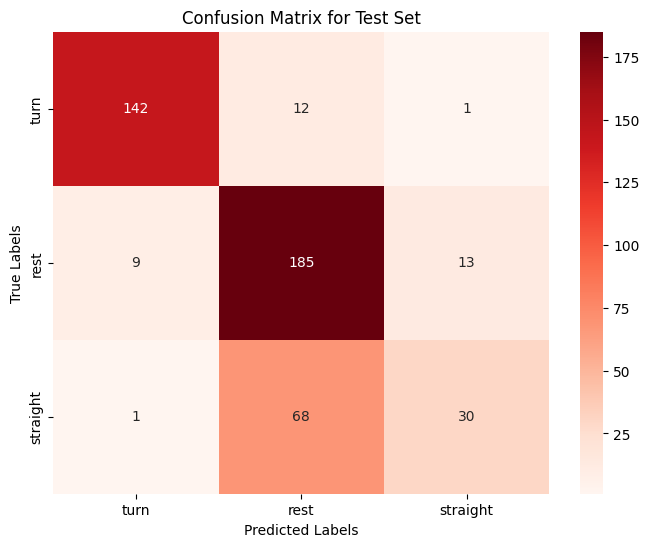

In [63]:
# TODO - Display confusion matrix and print classification report

# Step 1: Predict the labels for the test set
y_test_pred = grid.best_estimator_.predict(X_test)

# Step 2: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Step 3: Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
class_labels = list(set(y_test))  # Extract unique class labels
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()



___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [69]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1

# Define the selected features (replace with the actual features selected in Section 5.1)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']  # Example selected features

# Load the target vector (motion_state) from test_set1 into y1
y1 = test_set1['motion_state']

# Load the selected features from test_set1 into X1
X1 = test_set1[selected_features]

X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [72]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2

# Define the selected features (replace with the actual features selected in Section 5.1)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']  # Example selected features

# Load the target vector (motion_state) from test_set1 into y1
y2 = test_set2['motion_state']

# Load the selected features from test_set1 into X1
X2 = test_set2[selected_features]

X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [84]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Test-set accuracy on test_set1
test_score1 = grid.score(X1, y1)  # Accuracy on test_set1
print("test_set1 score: {:.2f}".format(test_score1))

# Test-set accuracy on test_set2
test_score2 = grid.score(X2, y2)  # Accuracy on test_set2
print("test_set2 score: {:.2f}".format(test_score2))

test_set1 score: 0.74
test_set2 score: 0.74


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

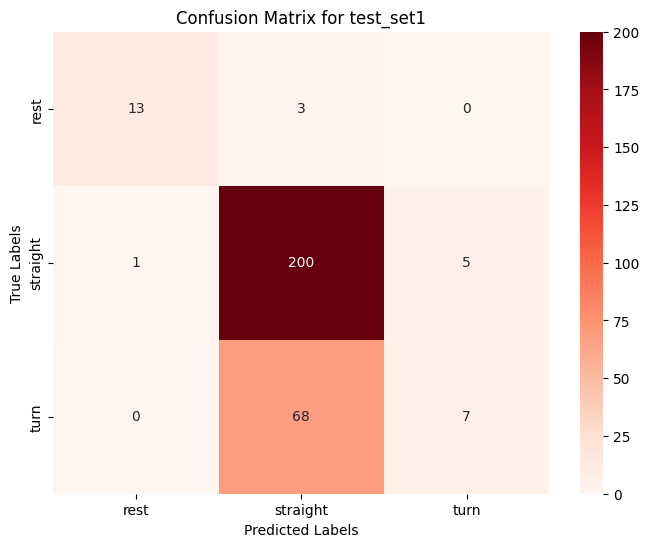

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.93      0.81      0.87        16
    straight       0.74      0.97      0.84       206
        turn       0.58      0.09      0.16        75

    accuracy                           0.74       297
   macro avg       0.75      0.63      0.62       297
weighted avg       0.71      0.74      0.67       297



In [81]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# Ensure both true labels and predicted labels are in the same format (either string or integer)
y1 = y1.astype(str)  # Convert y1 to string format
y1_pred = y1_pred.astype(str)  # Convert predictions to string format

# Generate the confusion matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Ensure class labels are taken from the target variable
class_labels = sorted(y1.unique())  # Unique labels from y1

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Print the classification report
print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred, target_names=[str(label) for label in class_labels]))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion Matrix for test_set2:
[[ 13   3   0]
 [  1 200   5]
 [  0  68   7]]

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.93      0.81      0.87        16
    straight       0.74      0.97      0.84       206
        turn       0.58      0.09      0.16        75

    accuracy                           0.74       297
   macro avg       0.75      0.63      0.62       297
weighted avg       0.71      0.74      0.67       297



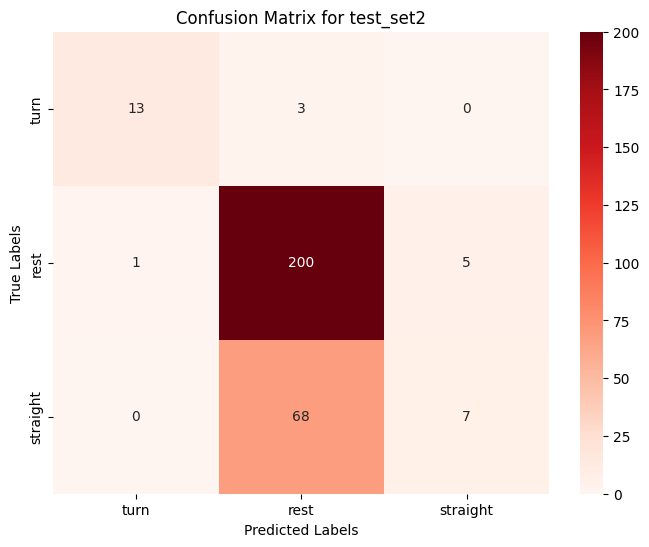

In [85]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Step 1: Predict the labels for test_set2 using the trained model
y2_pred = grid.best_estimator_.predict(X2)

# Step 2: Compute the confusion matrix
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Print the confusion matrix
print("Confusion Matrix for test_set2:")
print(conf_matrix2)

# Step 3: Print the classification report
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred))

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
class_labels = list(set(y2))  # Extract unique class labels from the target variable
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Notes:
# 1. `grid.best_estimator_`:
#    - Retrieves the best model identified during grid search.
# 2. `.predict(X2)`:
#    - Uses the best-trained model to predict labels for the features in `test_set2`.
# 3. `confusion_matrix(y2, y2_pred)`:
#    - Computes the confusion matrix by comparing the true labels (`y2`) with the predicted labels (`y2_pred`).
# 4. `classification_report(y2, y2_pred)`:
#    - Provides detailed metrics (precision, recall, F1-score, and support) for each class.
# 

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer 
1.The Random Forest model outperformed SVC across datasets, particularly on test_set2, where SVC struggled due to its sensitivity to feature distribution differences. Random Forest’s ensemble nature and robustness to non-linear patterns allowed it to generalize better, while SVC’s reliance on precise hyperparameter tuning and consistent distributions limited its performance. This highlights Random Forest’s superior adaptability to diverse data.


____